# Predicting Diabetes: A Logistic Regression Exercise

[![Diabetes Dataset](https://img.shields.io/badge/Dataset-Kaggle-blueviolet)](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

**Challenge:**  Can you predict whether a patient has diabetes based on key health metrics?  Build a logistic regression model to classify individuals as diabetic or non-diabetic.

**Features:**

| Feature                     | Description                                                 |
|------------------------------|-------------------------------------------------------------|
| Pregnancies                  | Number of times pregnant                                     |
| Glucose                     | Plasma glucose concentration (2 hours after oral glucose test) |
| BloodPressure               | Diastolic blood pressure (mm Hg)                           |
| SkinThickness                | Triceps skin fold thickness (mm)                            |
| Insulin                     | 2-Hour serum insulin (mu U/ml)                             |
| BMI                         | Body mass index (weight in kg/(height in m)^2)               |
| DiabetesPedigreeFunction     | Diabetes pedigree function                                   |
| Age                         | Age (years)                                                |


**Target Variable:**

* **Outcome:**  Binary classification (0 = No Diabetes, 1 = Diabetes)


**Exercise Goal:** Develop a logistic regression model that accurately predicts the `Outcome` based on the provided features.  Consider exploring data cleaning, feature engineering, and model evaluation techniques to optimize your predictions.

In [46]:
# importing libraries
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Read the data

In [2]:
# Download the data
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [39]:
# read the dataset
df = pd.read_csv(path + "/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing & Exploratory Data Analysis (EDA) & Feature Engineering





In [40]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Data types of each column
print(df.info())

# Explore the distribution of the target variable
print(df['Outcome'].value_counts())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

In [41]:
def replace_zeros_with_mean(df, columns):
    for col in columns:
        # Calculate the mean of non-zero values in the column
        mean_val = df.loc[df[col] != 0, col].mean()

        # Replace zeros with the calculated mean
        df.loc[df[col] == 0, col] = mean_val

    return df


# Example usage (replace with your actual columns)
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df = replace_zeros_with_mean(df, columns_to_check)
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

<ipython-input-41-2af6f585e9a8>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val
<ipython-input-41-2af6f585e9a8>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val
<ipython-input-41-2af6f585e9a8>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.153419593345657' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val
<ipython-input-41-2af6f585e9a8>:7: FutureWarning: Setting an item of inc

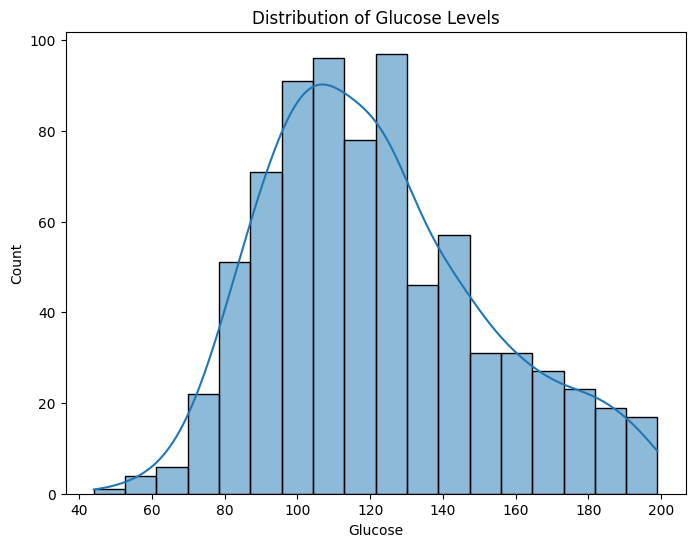

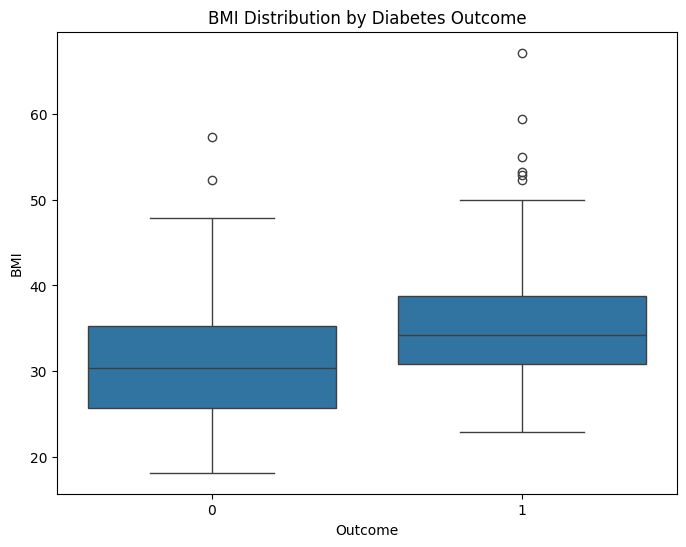

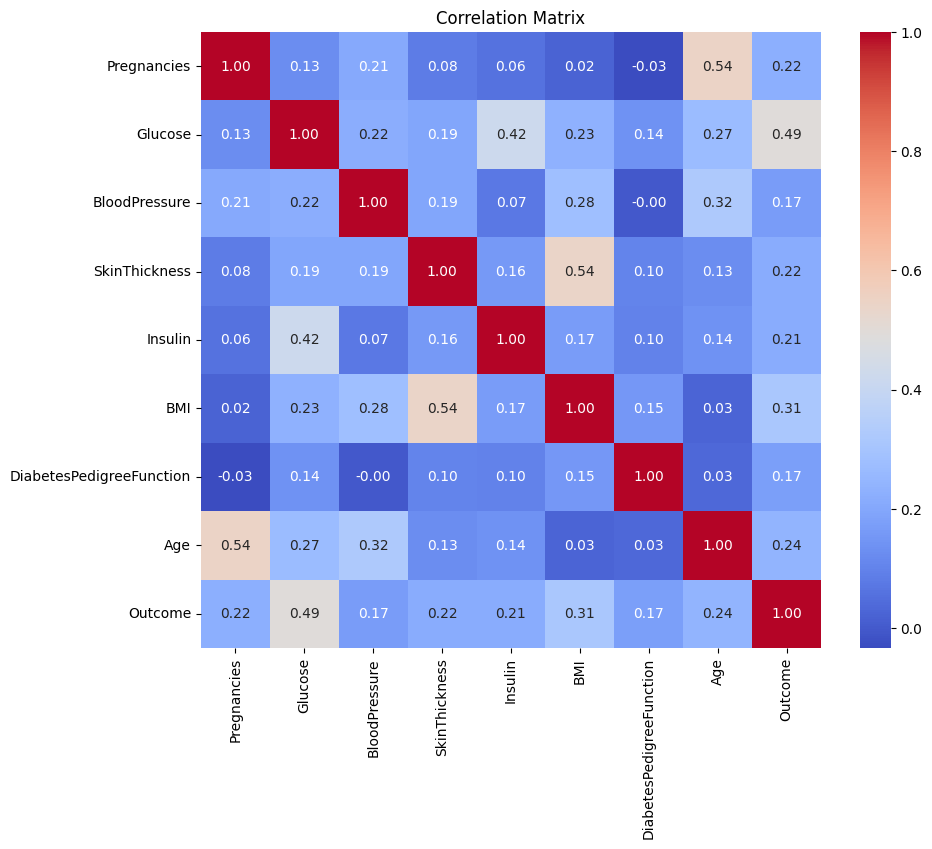

In [44]:
# Visualizations (Histograms, box plots, etc.) to understand data distribution

# Histogram of 'Glucose'
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()


# Boxplot of 'BMI' by 'Outcome'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Train logistic regression models

Regular Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533


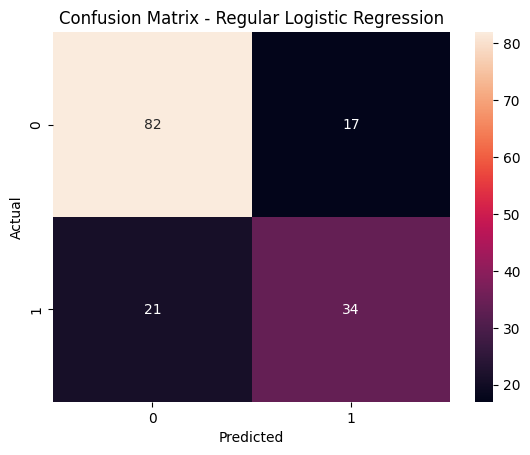

In [47]:
# Train a regular logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Regular Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Regular Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The accuracy is 75%, which seems okay at first. But we need to look at other measurements too, like recall, F1-score, and precision. These are good for the '0' category, but not so good for the '1' category. This means the model might not be very reliable, probably because there aren't equal amounts of '0' and '1' labels in the data.

This exercise is made by [Ali Alqutayfi](https://www.linkedin.com/in/ali-alqutayfi/).